In [2]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% ! important;}
div.cell.code_cell.rendered{width:100%}
div.input_prompt{padding:0px}
div.CodeMirror {font-family:Consolas ; font-size:12pt;}
div.text_cell_render.rendered_html {font-size:12pt;}
div.output {font-size:12pt; font-weight:bold}
div.input {font-family:Consolas ; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper {padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="6" color="red">ch.12 데이터 시각화</font></b>
- 시각화 라이브러리 : matplotlib, seaborn, folium(지도시각화)
- matplotlib : 파이썬에서 가장 많이 사용하는 시각화 라이브러리. 판다스 내부에 포함
- seaborn : matplotlib 기반으로 다양한 색, 테마, 차트 기능. groupby 기능 추가한 라이브러리
# 1절 matplotlib
- https://pypi.org/project/matplotlib/
- https://matplotlib.org/stable/api/pyplot_summary.html
## 1.1 패키지 import 및 기본 설정

In [4]:
import matplotlib
matplotlib.__version__

'3.7.0'

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
# 한글설정(windows mac)

# warnig을 안보이게
import warnings
warnings.filterwarnings(action='ignore') # warning 안 보이게

## 1.2 그래프 그리기
- matplolib으로 그래프 그리기
    1) 데이터 준비하기 <br>
    2) 그래프 생성 <br>
    3) 그래프 함수로 그리기 <br>
    4) 그래프 커스터마이징 <br>
    5) 그래프 출력 및 저장<br>

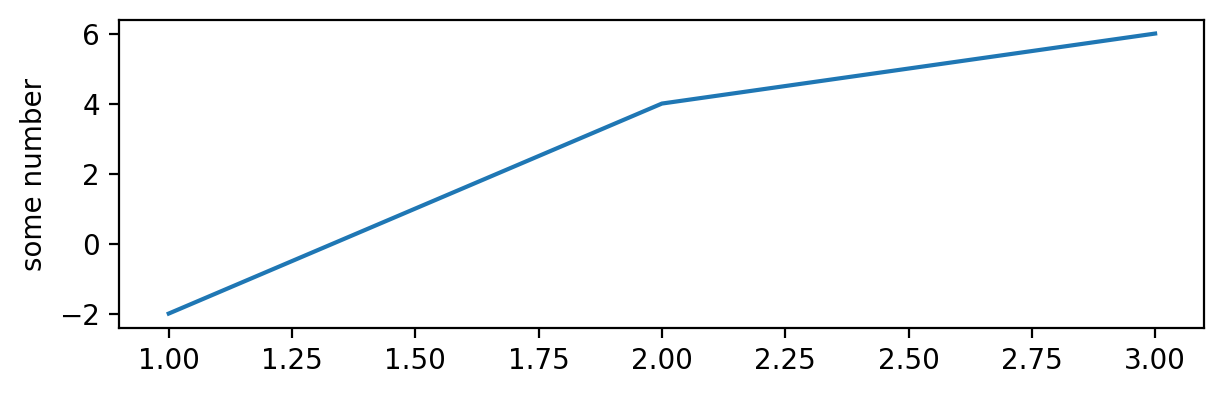

In [19]:
x=[1, 2, 3] # 1)
y=[-2, 4, 6] 
plt.figure(figsize=(7,2)) # 2) 그래프 객체 생성(사이즈는 인치)
plt.plot(x,y) # 3)
plt.ylabel('some number') # 4)커스터마이징
# plt.show() # 5) 출력
plt.savefig('data/ch12.png') # 파일 출력

## 1.3 그래프 영역 나누기
### 1) subplot()함수로 서브플롯 추가

In [25]:
import numpy as np
x = np.arange(0,10,0.1) #x = np.linspace(0,9.9,100)
x.shape

(100,)

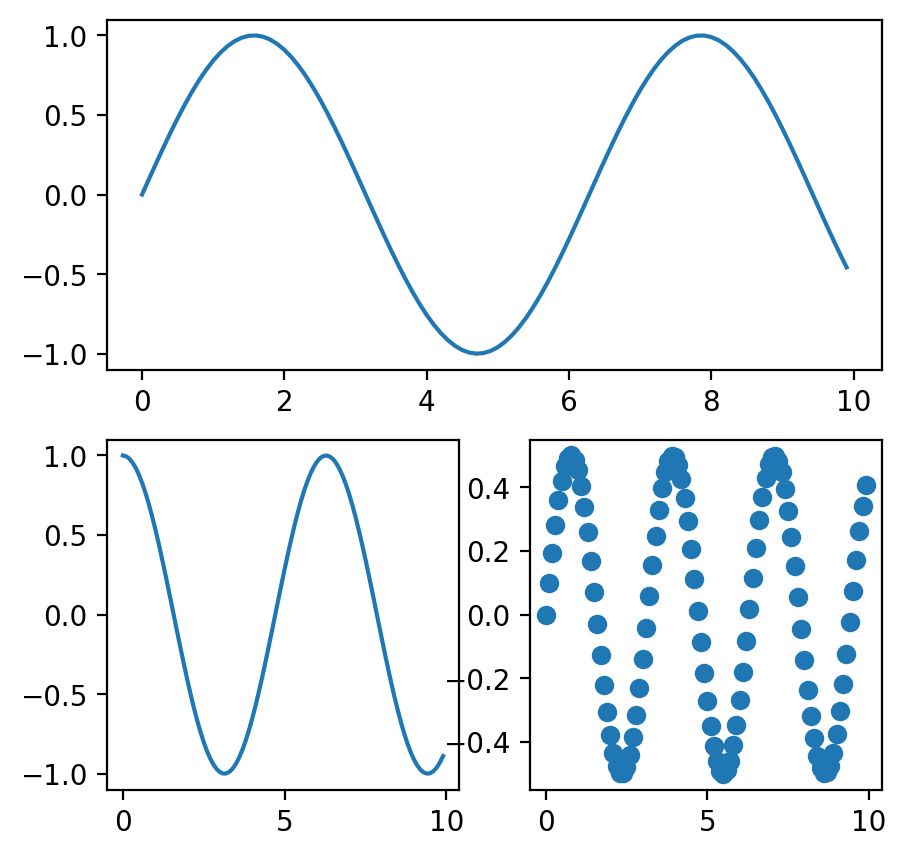

In [30]:
plt.figure(figsize=(5,5))
plt.subplot(2,1,1) # 2행 1열로 subplot에서 1번째 subplot은 다음과 같이 그린다.
plt.plot(x, np.sin(x))
plt.subplot(2,2,3) # 2행 2열 subplot중 3번째 subplot
plt.plot(x, np.cos(x))
plt.subplot(224) # 2행 2열 subplot 중 4번째 subplot
plt.scatter(x, np.sin(x)*np.cos(x))
plt.show()

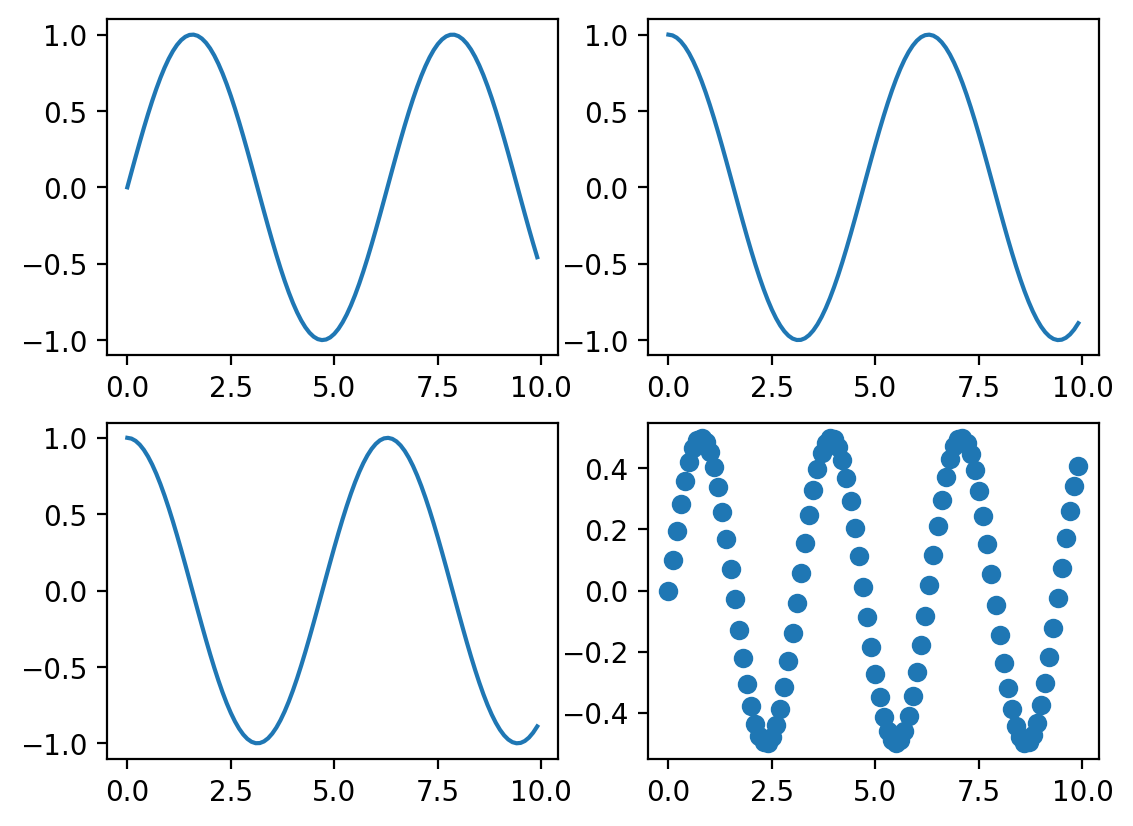

In [31]:
plt.subplot(2,2,1) 
plt.plot(x, np.sin(x))
plt.subplot(2,2,2)
plt.plot(x, np.cos(x))
plt.subplot(2,2,3) 
plt.plot(x, np.cos(x))
plt.subplot(224) 
plt.scatter(x, np.sin(x)*np.cos(x))
plt.show()

### 2) subplots() 함수로 서브플롯 추가
- plot함수에 색상이나 스타일 조정(교안 14page) https://wikidocs.net/92085

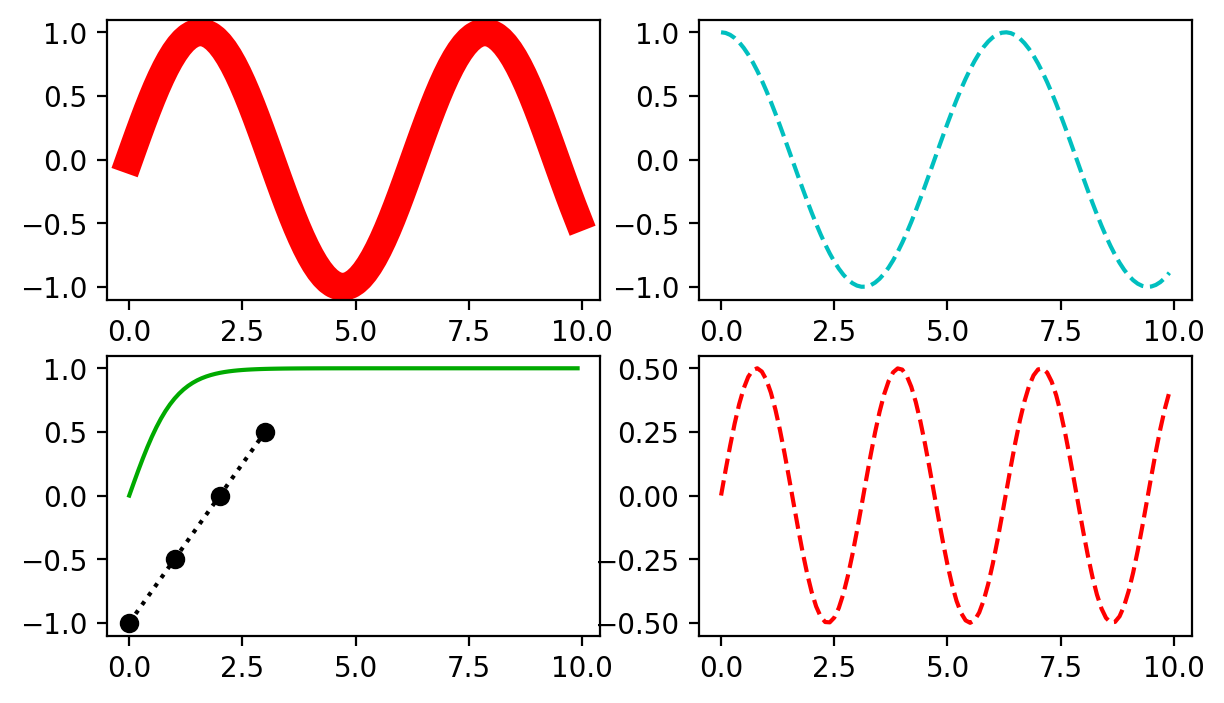

In [48]:
# 2행 2열 서브플롯
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(7,4))
axes[0,0].plot(x,np.sin(x),c='r', linewidth=10)
axes[0,1].plot(x, np.cos(x), 'c--') #c='c', linestyle='--'
axes[1,0].plot(x,np.tanh(x), '#00AA00')
axes[1,0].plot([0,1,2,3],[-1,-0.5,0,0.5],'ko:') # k: black, marker='o', linestyle=':'
axes[1,1].plot(x, np.sin(x)*np.cos(x), 'r--')
plt.show()

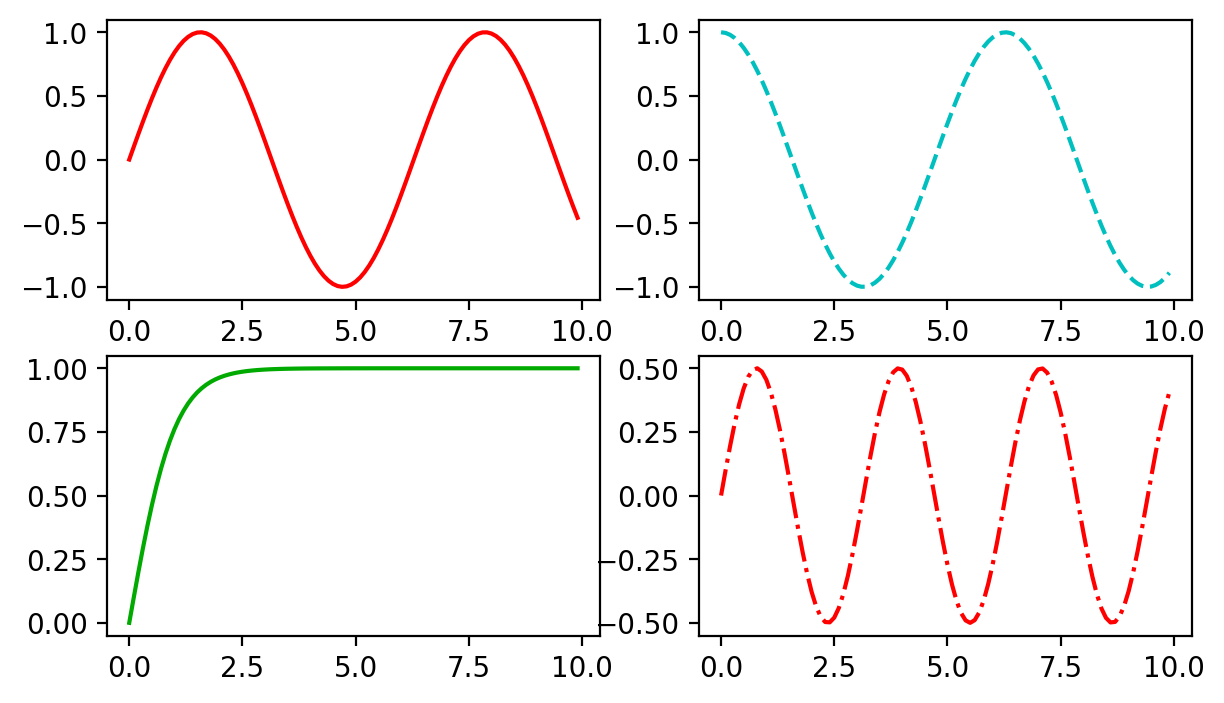

In [55]:
 # 2행 2열 서브플롯(for)
func = [np.sin, np.cos, np.tanh, lambda x : np.sin(x)*np.cos(x)]
fmt = ['r','c--','#00AA00', 'r-.']
fig, axes = plt.subplots(2,2,figsize=(7,4))
list(enumerate(axes.flat))
for i, ax in enumerate(axes.flat):
    ax.plot(x, func[i](x),fmt[i])

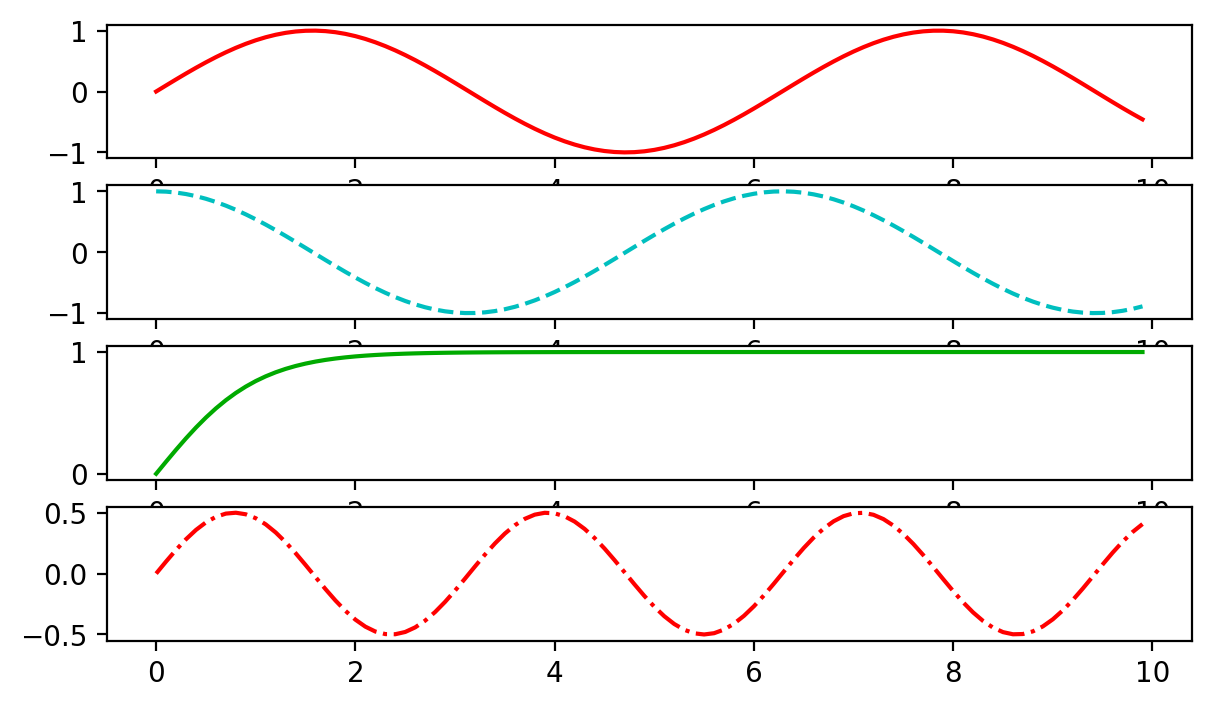

In [56]:
 # 4행 1열 서브플롯(for)
func = [np.sin, np.cos, np.tanh, lambda x : np.sin(x)*np.cos(x)]
fmt = ['r','c--','#00AA00', 'r-.']
fig, axes = plt.subplots(4,1,figsize=(7,4))
for i, ax in enumerate(axes):
    ax.plot(x, func[i](x),fmt[i])

## 1.4 다양한 그래프 그리기
### 1) pyplot 함수들(교안 16page) https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html

### 2) matplotlib.pyplot.plot() : 선그래프

### 3) pandas.DataFrame.plot()